In [1]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

In [2]:
### Step 2: Connect to MongoDB & Load Data
# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["hotel_guests"]  # Using the corrected database name
collection = db["dining_info"]  # Collection Name

In [3]:
# Load data into a Pandas DataFrame
df = pd.DataFrame(list(collection.find()))

In [4]:
df

,_id,transaction_id,customer_id,Preferred Cusine,age,dish,Qty,price_for_1,number_of_stayers,check_in_date,check_out_date,order_time,booked_through_points
0,67ade58d0c0e9b3bd5ca6247,3594217,91,South Indian,31,Filter Coffee,2,80,1,2023-08-07,2023-08-10 18:33:11,2023-08-09 03:40:45,0
1,67ade58d0c0e9b3bd5ca6248,10163344,92,South Indian,21,Chocolate Cake,2,200,2,2023-08-08,2023-08-10 04:10:06,2023-08-08 19:20:37,0
2,67ade58d0c0e9b3bd5ca6249,12292432,93,North Indian,48,Breakfast thali,1,500,2,2023-11-15,2023-11-17 08:21:37,2023-11-15 14:01:51,1
3,67ade58d0c0e9b3bd5ca624a,13757710,94,South Indian,25,Roti Curry,3,100,3,2024-03-31,2024-04-03 09:35:00,2024-03-31 11:17:37,0
4,67ade58d0c0e9b3bd5ca624b,10762656,95,North Indian,22,Filter Coffee,1,80,1,2024-04-08,2024-04-11 02:22:57,2024-04-10 23:00:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67ade58e0c0e9b3bd5ca8952,6513286,23,South Indian,30,Filter Coffee,1,80,1,2024-10-09,2024-10-10 21:11:26,2024-10-10 16:27:09,0
9996,67ade58e0c0e9b3bd5ca8953,4578482,12,North Indian,35,Roti Curry,1,100,1,2023-07-20,2023-07-21 12:39:56,2023-07-20 06:28:37,0
9997,67ade58e0c0e9b3bd5ca8954,1394756,13,South Indian,45,Palak Paneer,2,250,1,2023-07-26,2023-07-29 18:12:23,2023-07-28 03:08:27,0
9998,67ade58e0c0e9b3bd5ca8955,6277632,3,South Indian,28,Roti Curry,3,100,3,2023-02-01,2023-02-06 07:30:00,2023-02-02 15:28:08,0


In [5]:
# Drop MongoDB's default '_id' column 
df.drop("_id", axis=1, inplace=True)

In [6]:
df

,transaction_id,customer_id,Preferred Cusine,age,dish,Qty,price_for_1,number_of_stayers,check_in_date,check_out_date,order_time,booked_through_points
0,3594217,91,South Indian,31,Filter Coffee,2,80,1,2023-08-07,2023-08-10 18:33:11,2023-08-09 03:40:45,0
1,10163344,92,South Indian,21,Chocolate Cake,2,200,2,2023-08-08,2023-08-10 04:10:06,2023-08-08 19:20:37,0
2,12292432,93,North Indian,48,Breakfast thali,1,500,2,2023-11-15,2023-11-17 08:21:37,2023-11-15 14:01:51,1
3,13757710,94,South Indian,25,Roti Curry,3,100,3,2024-03-31,2024-04-03 09:35:00,2024-03-31 11:17:37,0
4,10762656,95,North Indian,22,Filter Coffee,1,80,1,2024-04-08,2024-04-11 02:22:57,2024-04-10 23:00:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6513286,23,South Indian,30,Filter Coffee,1,80,1,2024-10-09,2024-10-10 21:11:26,2024-10-10 16:27:09,0
9996,4578482,12,North Indian,35,Roti Curry,1,100,1,2023-07-20,2023-07-21 12:39:56,2023-07-20 06:28:37,0
9997,1394756,13,South Indian,45,Palak Paneer,2,250,1,2023-07-26,2023-07-29 18:12:23,2023-07-28 03:08:27,0
9998,6277632,3,South Indian,28,Roti Curry,3,100,3,2023-02-01,2023-02-06 07:30:00,2023-02-02 15:28:08,0


In [7]:
# Print columns to confirm data is loaded correctly
print("Columns in the dataset:", df.columns.tolist())

Columns in the dataset: ['transaction_id', 'customer_id', 'Preferred Cusine', 'age', 'dish', 'Qty', 'price_for_1', 'number_of_stayers', 'check_in_date', 'check_out_date', 'order_time', 'booked_through_points']


In [8]:
### Step 3: Convert Data Types & Handle Missing Values
# Convert timestamps to datetime format
df['order_time'] = pd.to_datetime(df['order_time'])
df['check_in_date'] = pd.to_datetime(df['check_in_date'])
df['check_out_date'] = pd.to_datetime(df['check_out_date'])

In [9]:
# Fill missing stay_duration with (check_out_date - check_in_date) no.of days
df['stay_duration'] = (df['check_out_date'] - df['check_in_date']).dt.days.fillna(0)

In [10]:
df

,transaction_id,customer_id,Preferred Cusine,age,dish,Qty,price_for_1,number_of_stayers,check_in_date,check_out_date,order_time,booked_through_points,stay_duration
0,3594217,91,South Indian,31,Filter Coffee,2,80,1,2023-08-07,2023-08-10 18:33:11,2023-08-09 03:40:45,0,3
1,10163344,92,South Indian,21,Chocolate Cake,2,200,2,2023-08-08,2023-08-10 04:10:06,2023-08-08 19:20:37,0,2
2,12292432,93,North Indian,48,Breakfast thali,1,500,2,2023-11-15,2023-11-17 08:21:37,2023-11-15 14:01:51,1,2
3,13757710,94,South Indian,25,Roti Curry,3,100,3,2024-03-31,2024-04-03 09:35:00,2024-03-31 11:17:37,0,3
4,10762656,95,North Indian,22,Filter Coffee,1,80,1,2024-04-08,2024-04-11 02:22:57,2024-04-10 23:00:56,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6513286,23,South Indian,30,Filter Coffee,1,80,1,2024-10-09,2024-10-10 21:11:26,2024-10-10 16:27:09,0,1
9996,4578482,12,North Indian,35,Roti Curry,1,100,1,2023-07-20,2023-07-21 12:39:56,2023-07-20 06:28:37,0,1
9997,1394756,13,South Indian,45,Palak Paneer,2,250,1,2023-07-26,2023-07-29 18:12:23,2023-07-28 03:08:27,0,3
9998,6277632,3,South Indian,28,Roti Curry,3,100,3,2023-02-01,2023-02-06 07:30:00,2023-02-02 15:28:08,0,5


In [11]:
## Step 4: Data Splitting
# Define date-based splits
feature_cutoff = datetime(2024, 1, 1)
train_cutoff = datetime(2024, 10, 1)

In [12]:
# Feature Extraction Dataset (Before Jan 1, 2024)
features_df = df[df['order_time'] < feature_cutoff]

In [13]:
# Training Dataset (Jan 1, 2024 - Oct 1, 2024)
train_df = df[(df['order_time'] >= feature_cutoff) & (df['order_time'] < train_cutoff)]

In [14]:
# Testing Dataset (After Oct 1, 2024)
test_df = df[df['order_time'] >= train_cutoff]

In [15]:
### Features

In [16]:
customer_behavior_features = features_df.groupby("customer_id").agg(
    unique_dishes_ordered=("dish", "nunique"),
    unique_cuisines_ordered=("Preferred Cusine", "nunique"),
    most_common_dish=("dish", lambda x: x.mode()[0] if not x.mode().empty else "Unknown"),
    most_common_cuisine=("Preferred Cusine", lambda x: x.mode()[0] if not x.mode().empty else "Unknown"),
).reset_index()

In [17]:
age_features =features_df.groupby('age').agg(
    age_pref_cuisine=("Preferred Cusine", lambda x: x.mode()[0] if not x.mode().empty else "Unknown"),
    fav_dish_as_per_age=("dish", lambda x: x.mode()[0] if not x.mode().empty else "Unknown"),

).reset_index()

In [18]:
stayed_features = features_df.groupby('number_of_stayers').agg(
    stay_pref=("dish", lambda x: x.mode()[0] if not x.mode().empty else "Unknown"),
    avg_spend_per_stay=("price_for_1", "mean")
).reset_index()

In [19]:
loyalty_features = features_df.groupby("customer_id").agg(
    total_points_used=("booked_through_points", "sum"),
    discount_sensitive_orders=("booked_through_points", lambda x: (x > 0).sum())
).reset_index()


In [20]:
features_df["days_since_last_order"] = (features_df["order_time"].max() - features_df["order_time"]).dt.days

customer_recency_features = features_df.groupby("customer_id").agg(
    avg_days_between_orders=("days_since_last_order", "mean"),
    last_order_days_ago=("days_since_last_order", "min"),
).reset_index()

C:\Users\Bhargavi Nagulapally\AppData\Local\Temp\ipykernel_11972\1203166534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df["days_since_last_order"] = (features_df["order_time"].max() - features_df["order_time"]).dt.days


In [21]:
### Step 5: Feature Engineering (Customer-Level Features)
customer_features = features_df.groupby("customer_id").agg(
    total_orders_per_customer=("transaction_id", "count"),
    avg_spend_per_customer=("price_for_1", "mean"),
    total_qty_per_customer=("Qty", "sum"),
    fav_dish_per_customer=("dish", lambda x: x.mode()[0] if not x.mode().empty else "Unknown"),
    most_preferred_cuisine=("Preferred Cusine", lambda x: x.mode()[0] if not x.mode().empty else "Unknown"),
).reset_index()

In [22]:
### Step 6: Feature Engineering (Cuisine-Level Features)
cuisine_features = features_df.groupby("Preferred Cusine").agg(
    avg_price_per_cuisine=("price_for_1", "mean"),
    total_orders_per_cuisine=("transaction_id", "count"),
    most_preferred_cuisine_dish=("dish", lambda x: x.mode()[0] if not x.mode().empty else "Unknown"),
).reset_index()

In [23]:
### Step 7: Merge Features into Training & Testing Data
train_df = train_df.merge(customer_features, on="customer_id", how="left")
train_df = train_df.merge(cuisine_features, on="Preferred Cusine", how="left")
train_df = train_df.merge(age_features, on="age", how="left")
train_df = train_df.merge(stayed_features, on="number_of_stayers", how="left")
train_df = train_df.merge(loyalty_features, on="customer_id", how="left")
train_df = train_df.merge(customer_recency_features, on="customer_id", how="left")
train_df = train_df.merge(customer_behavior_features, on="customer_id", how="left")

In [24]:
train_df

,transaction_id,customer_id,Preferred Cusine,age,dish,Qty,price_for_1,number_of_stayers,check_in_date,check_out_date,...,stay_pref,avg_spend_per_stay,total_points_used,discount_sensitive_orders,avg_days_between_orders,last_order_days_ago,unique_dishes_ordered,unique_cuisines_ordered,most_common_dish,most_common_cuisine
0,13757710,94,South Indian,25,Roti Curry,3,100,3,2024-03-31,2024-04-03 09:35:00,...,Idli,230.502742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10762656,95,North Indian,22,Filter Coffee,1,80,1,2024-04-08,2024-04-11 02:22:57,...,Idli,223.966292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,191055,96,Multi,49,Filter Coffee,2,80,2,2024-02-04,2024-02-05 12:35:30,...,Idli,237.343096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2218987,98,North Indian,27,Utthappam,3,150,2,2024-08-27,2024-08-30 10:25:05,...,Idli,237.343096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11395050,101,Multi,29,Palak Paneer,1,250,1,2024-04-20,2024-04-21 11:37:28,...,Idli,223.966292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,15645483,7,Multi,55,Idli,2,75,1,2024-09-05,2024-09-07 10:59:21,...,Idli,223.966292,12.0,12.0,183.253731,10.0,15.0,1.0,Idli,Multi
3974,2431985,19,Multi,32,Aloo Paratha,1,200,1,2024-01-07,2024-01-10 17:14:15,...,Idli,223.966292,7.0,7.0,187.033333,11.0,12.0,1.0,Utthappam,Multi
3975,12202780,20,Multi,48,Breakfast thali,1,500,1,2024-09-07,2024-09-09 09:16:53,...,Idli,223.966292,6.0,6.0,176.636364,13.0,13.0,1.0,Filter Coffee,Multi
3976,10225236,33,North Indian,31,Masala Dosa,3,150,3,2024-07-21,2024-07-23 06:41:07,...,Idli,230.502742,5.0,5.0,173.483871,6.0,13.0,1.0,Filter Coffee,North Indian


In [25]:
train_df.drop(['transaction_id','check_in_date','check_out_date','order_time','customer_id','price_for_1'],axis=1,inplace=True)

In [26]:
train_df

,Preferred Cusine,age,dish,Qty,number_of_stayers,booked_through_points,stay_duration,total_orders_per_customer,avg_spend_per_customer,total_qty_per_customer,...,stay_pref,avg_spend_per_stay,total_points_used,discount_sensitive_orders,avg_days_between_orders,last_order_days_ago,unique_dishes_ordered,unique_cuisines_ordered,most_common_dish,most_common_cuisine
0,South Indian,25,Roti Curry,3,3,0,3,NaN,NaN,NaN,...,Idli,230.502742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,North Indian,22,Filter Coffee,1,1,0,3,NaN,NaN,NaN,...,Idli,223.966292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Multi,49,Filter Coffee,2,2,0,1,NaN,NaN,NaN,...,Idli,237.343096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North Indian,27,Utthappam,3,2,0,3,NaN,NaN,NaN,...,Idli,237.343096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Multi,29,Palak Paneer,1,1,0,1,NaN,NaN,NaN,...,Idli,223.966292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,Multi,55,Idli,2,1,0,2,67.0,220.373134,123.0,...,Idli,223.966292,12.0,12.0,183.253731,10.0,15.0,1.0,Idli,Multi
3974,Multi,32,Aloo Paratha,1,1,0,3,30.0,218.833333,49.0,...,Idli,223.966292,7.0,7.0,187.033333,11.0,12.0,1.0,Utthappam,Multi
3975,Multi,48,Breakfast thali,1,1,0,2,33.0,208.787879,54.0,...,Idli,223.966292,6.0,6.0,176.636364,13.0,13.0,1.0,Filter Coffee,Multi
3976,North Indian,31,Masala Dosa,3,3,0,2,31.0,195.161290,59.0,...,Idli,230.502742,5.0,5.0,173.483871,6.0,13.0,1.0,Filter Coffee,North Indian


In [27]:
train_df.columns

Index(['Preferred Cusine', 'age', 'dish', 'Qty', 'number_of_stayers',
       'booked_through_points', 'stay_duration', 'total_orders_per_customer',
       'avg_spend_per_customer', 'total_qty_per_customer',
       'fav_dish_per_customer', 'most_preferred_cuisine',
       'avg_price_per_cuisine', 'total_orders_per_cuisine',
       'most_preferred_cuisine_dish', 'age_pref_cuisine',
       'fav_dish_as_per_age', 'stay_pref', 'avg_spend_per_stay',
       'total_points_used', 'discount_sensitive_orders',
       'avg_days_between_orders', 'last_order_days_ago',
       'unique_dishes_ordered', 'unique_cuisines_ordered', 'most_common_dish',
       'most_common_cuisine'],
      dtype='object')

In [28]:
# Select categorical columns for one-hot encoding
categorical_cols = ['Preferred Cusine','fav_dish_per_customer','most_preferred_cuisine','most_preferred_cuisine_dish','age_pref_cuisine','fav_dish_as_per_age','stay_pref','most_common_dish','most_common_cuisine']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Apply transformation
encoded_array = encoder.fit_transform(train_df[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with the original DataFrame
train_df = pd.concat([train_df.drop(columns=categorical_cols), encoded_df], axis=1)

c:\Users\Bhargavi Nagulapally\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
train_df

,age,dish,Qty,number_of_stayers,booked_through_points,stay_duration,total_orders_per_customer,avg_spend_per_customer,total_qty_per_customer,avg_price_per_cuisine,...,most_common_dish_Idli,most_common_dish_Masala Dosa,most_common_dish_North Indian Thali,most_common_dish_Roti Curry,most_common_dish_Utthappam,most_common_dish_nan,most_common_cuisine_Multi,most_common_cuisine_North Indian,most_common_cuisine_South Indian,most_common_cuisine_nan
0,25,Roti Curry,3,3,0,3,NaN,NaN,NaN,227.418182,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,22,Filter Coffee,1,1,0,3,NaN,NaN,NaN,220.965868,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,49,Filter Coffee,2,2,0,1,NaN,NaN,NaN,236.960289,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,27,Utthappam,3,2,0,3,NaN,NaN,NaN,220.965868,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,29,Palak Paneer,1,1,0,1,NaN,NaN,NaN,236.960289,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,55,Idli,2,1,0,2,67.0,220.373134,123.0,236.960289,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3974,32,Aloo Paratha,1,1,0,3,30.0,218.833333,49.0,236.960289,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3975,48,Breakfast thali,1,1,0,2,33.0,208.787879,54.0,236.960289,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3976,31,Masala Dosa,3,3,0,2,31.0,195.161290,59.0,220.965868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
train_df.columns

Index(['age', 'dish', 'Qty', 'number_of_stayers', 'booked_through_points',
       'stay_duration', 'total_orders_per_customer', 'avg_spend_per_customer',
       'total_qty_per_customer', 'avg_price_per_cuisine',
       'total_orders_per_cuisine', 'avg_spend_per_stay', 'total_points_used',
       'discount_sensitive_orders', 'avg_days_between_orders',
       'last_order_days_ago', 'unique_dishes_ordered',
       'unique_cuisines_ordered', 'Preferred Cusine_Multi',
       'Preferred Cusine_North Indian', 'Preferred Cusine_South Indian',
       'fav_dish_per_customer_Aloo Paratha',
       'fav_dish_per_customer_Breakfast thali',
       'fav_dish_per_customer_Chinese Noodles',
       'fav_dish_per_customer_Chocolate Cake',
       'fav_dish_per_customer_Filter Coffee', 'fav_dish_per_customer_Idli',
       'fav_dish_per_customer_Masala Dosa',
       'fav_dish_per_customer_North Indian Thali',
       'fav_dish_per_customer_Roti Curry', 'fav_dish_per_customer_Utthappam',
       'fav_dish_per_c

In [31]:
test_df = test_df.merge(customer_features, on="customer_id", how="left")
test_df = test_df.merge(cuisine_features, on="Preferred Cusine", how="left")
test_df = test_df.merge(age_features, on="age", how="left")
test_df = test_df.merge(stayed_features, on="number_of_stayers", how="left")
test_df = test_df.merge(loyalty_features, on="customer_id", how="left")
test_df = test_df.merge(customer_recency_features, on="customer_id", how="left")
test_df = test_df.merge(customer_behavior_features, on="customer_id", how="left")

In [32]:
test_df

,transaction_id,customer_id,Preferred Cusine,age,dish,Qty,price_for_1,number_of_stayers,check_in_date,check_out_date,...,stay_pref,avg_spend_per_stay,total_points_used,discount_sensitive_orders,avg_days_between_orders,last_order_days_ago,unique_dishes_ordered,unique_cuisines_ordered,most_common_dish,most_common_cuisine
0,11804825,99,North Indian,51,Masala Chai,1,80,1,2024-12-06,2024-12-08 17:39:10,...,Idli,223.966292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,866748,106,South Indian,43,South Indian Thali,2,500,1,2024-12-15,2024-12-17 13:48:00,...,Idli,223.966292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7877757,117,Multi,30,Roti Curry,1,100,1,2024-12-03,2024-12-06 23:03:14,...,Idli,223.966292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,136131,118,North Indian,27,Filter Coffee,1,80,1,2024-10-11,2024-10-16 04:11:21,...,Idli,223.966292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5080875,119,Multi,50,Filter Coffee,1,80,1,2024-12-15,2024-12-16 16:15:58,...,Idli,223.966292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,8560375,8,Multi,24,Filter Coffee,1,80,1,2024-10-31,2024-11-01 12:54:10,...,Idli,223.966292,11.0,11.0,187.720930,1.0,12.0,1.0,Filter Coffee,Multi
1606,15106597,6,North Indian,29,Filter Coffee,3,80,3,2024-12-11,2024-12-12 21:06:23,...,Idli,230.502742,7.0,7.0,206.880952,21.0,13.0,1.0,Utthappam,North Indian
1607,6241050,21,North Indian,40,Masala Chai,1,80,1,2024-10-08,2024-10-09 08:52:45,...,Idli,223.966292,1.0,1.0,205.666667,14.0,6.0,1.0,Breakfast thali,North Indian
1608,13852288,16,Multi,24,Breakfast thali,1,500,1,2024-12-04,2024-12-05 11:05:52,...,Idli,223.966292,3.0,3.0,201.571429,7.0,12.0,1.0,Filter Coffee,Multi


In [33]:
test_df.drop(['transaction_id','check_in_date','check_out_date','order_time','customer_id','price_for_1'],axis=1,inplace=True)

In [34]:
encoded_test = encoder.transform(test_df[categorical_cols])

# Convert to DataFrame
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with test_df
test_df = pd.concat([test_df.drop(columns=categorical_cols), encoded_test_df], axis=1)

In [35]:
test_df

,age,dish,Qty,number_of_stayers,booked_through_points,stay_duration,total_orders_per_customer,avg_spend_per_customer,total_qty_per_customer,avg_price_per_cuisine,...,most_common_dish_Idli,most_common_dish_Masala Dosa,most_common_dish_North Indian Thali,most_common_dish_Roti Curry,most_common_dish_Utthappam,most_common_dish_nan,most_common_cuisine_Multi,most_common_cuisine_North Indian,most_common_cuisine_South Indian,most_common_cuisine_nan
0,51,Masala Chai,1,1,0,2,NaN,NaN,NaN,220.965868,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,43,South Indian Thali,2,1,1,2,NaN,NaN,NaN,227.418182,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,30,Roti Curry,1,1,0,3,NaN,NaN,NaN,236.960289,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,27,Filter Coffee,1,1,0,5,NaN,NaN,NaN,220.965868,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,50,Filter Coffee,1,1,0,1,NaN,NaN,NaN,236.960289,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,24,Filter Coffee,1,1,0,1,43.0,232.674419,76.0,236.960289,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1606,29,Filter Coffee,3,3,0,1,42.0,201.428571,73.0,220.965868,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1607,40,Masala Chai,1,1,0,1,6.0,217.500000,11.0,220.965868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1608,24,Breakfast thali,1,1,0,1,21.0,186.666667,39.0,236.960289,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
train_df = train_df.dropna(subset=['dish'])
test_df = test_df.dropna(subset=['dish'])

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [38]:
# Encode the target column 'dish' using LabelEncoder for training data
train_df['dish'] = label_encoder.fit_transform(train_df['dish'])

In [39]:
# Split into training features (X) and target (y)
X_train = train_df.drop(columns=['dish'])  # Features
y_train = train_df['dish']

In [40]:
# Encode the target column 'dish' using LabelEncoder for testing data
test_df['dish'] = label_encoder.transform(test_df['dish']) 

In [41]:
# Split into testing features (X) and target (y)
X_test = test_df.drop(columns=['dish'])  # Features
y_test = test_df['dish']

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3978, 64)
(3978,)
(1610, 64)
(1610,)


In [58]:
xgb_model = XGBClassifier(
    objective="multi:softmax",  # Multi-class classification
    eval_metric="mlogloss",  # Multi-class log loss
    learning_rate=0.06,  
    max_depth=3,  
    n_estimators=150,  
    subsample=0.2,  
    colsample_bytree=0.2,  
    random_state=42,
)

In [59]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [60]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.1826086956521739

In [47]:
from sklearn.metrics import log_loss

# Train the XGBoost model on training data
xgb_model.fit(X_train, y_train)
y_pred_prob = xgb_model.predict_proba(X_test)

# Compute log loss
logloss = log_loss(y_test, y_pred_prob)

In [48]:
feature_importance = xgb_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

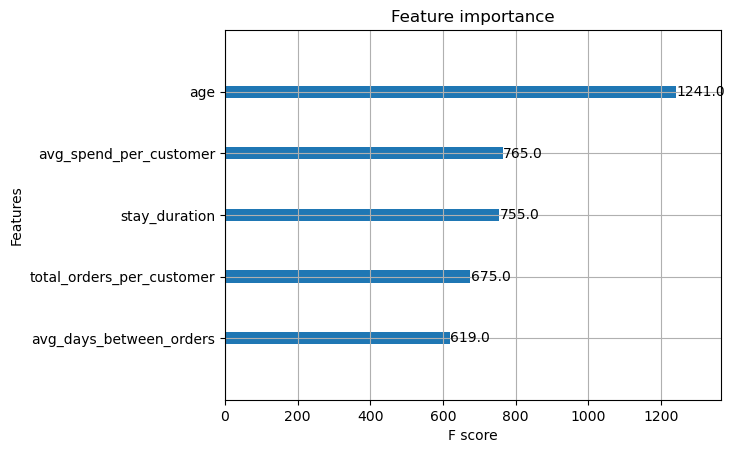

In [49]:
import matplotlib.pyplot as plt
import xgboost
xgboost.plot_importance(xgb_model, max_num_features=5)  # Show top 20 features
plt.show()